# Available models in the fitting routine

In this tutorial, we show the models that are available in the module. 

The models are python class objects that contains the model parameters, and have useful class function to manipulate them and to compute useful quantities from them. They can also be passed to the fitting routines that are available (see INSERT LINK).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import specpolFlow as pol
import BzFit_module as m

## 1. A dipolar field model

This model describes a dipole characterized by:
* An inclination angle of the rotational axis with respect to the observer (`i`)
* An obliquity angle of the magnetic axis with respect to the rotational axis (`beta`)
* A dipolar field strength (`Bpole`)
* A linear limb-darkening coefficient ($u=1-I_\mathrm{limb}/I_o$) that is used to compute the associated longitudinal magnetic field (`u`). 

We can define a model as such:

In [2]:
a = np.pi/180
my_dipole = m.dipole_model(45*a, 135*a, 5.0, 0.5)

The longitudinal magnetic field associate with this dipolar field is

$$B_\ell = \frac{B_p}{20}\frac{15+u}{3-u}(\cos\beta\cos i+ \sin\beta\sin i\cos\phi).$$

In terms of phases, this is therefore a simple cosine model 
$$B_\ell =  A\cos(\phi - \phi_o) + M,$$

for which $\phi_o=0$. 

Therefore when defining a `dipole_model` with dipolar paramters, the object includes a `cos_model` object as well (`self.cos_model`) that you can access (see next section for more details). In fact, under the hood the `dipole_model` uses class functions of the underlying `self.cos_model` to return e.g. the longitdinal magnetic field as a function of phase. 

But we provide a wrapper function for this directly in the `dipole_model` object:

Text(0, 0.5, 'Longitudinal magnetic field (kG)')

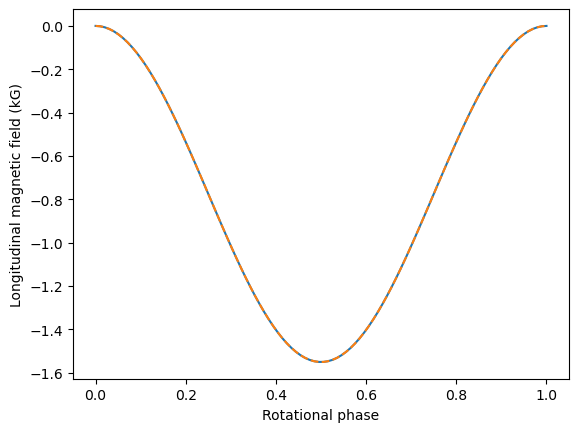

In [3]:
fig, ax = plt.subplots(1,1)

phi_arr = np.linspace(0, 1, 100) # create an array of phases

ax.plot(phi_arr, my_dipole.get_model(phi_arr*2*np.pi))

# This is the equivalent to accessing the cos_model:
ax.plot(phi_arr, my_dipole.cos_model.get_model(phi_arr*2*np.pi), ls='--')

ax.set_xlabel('Rotational phase')
ax.set_ylabel('Longitudinal magnetic field (kG)')

There are some useful class functions to create a dictionary (useful for making e.g. pandas dataframes), to return the initialzation values in an array format (useful for fitting functions), and to create a model object from a row in a pandas dataframe. 

In [4]:
# this will create a dictionary with 
# the initialization parameters to the dipole model
d = my_dipole.to_dict()
print(d)

# this will create a dictionary with
# the paramters for the associated cos_model object
print(my_dipole.cos_model.to_dict())

{'i': 0.7853981633974483, 'beta': 2.356194490192345, 'Bpole': 5.0, 'u': 0.5}
{'A': 0.7749999999999999, 'mean': -0.775, 'phi0': 0.0, 'max': -1.1102230246251565e-16, 'min': -1.5499999999999998, 'r': 1.3961158844848536e+16}
